In [3]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import time
import requests 
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Сброс ограничений на количество выводимых рядов
#pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
#pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
#pd.set_option('display.max_colwidth', None)



def date(soup):
    #Получение даты выпуска
    date = [r.text.split('. ')[1].split(' ')[2] for r in soup.find_all('h4', {'class':"pt-cv-title"})]
    return date

def name(soup):
    #Получение названия передачи
    name = [r.text.split('. ')[2].replace('.', '') for r in soup.find_all('h4', {'class':"pt-cv-title"})]
    return name

def url(soup):
    #получение ссылки на выпуск
    url = [r.find('a', {'class':'_self'}).get('href') for r in soup.find_all('h4', {'class':"pt-cv-title"})]
    return url

def description(soup):
    #Получение описания
    description = [BeautifulSoup(requests.get(url).text, "html.parser").find_all('div', {'class':"entry"})[0].find('p').text for url in url(soup)]
    return description

def comments(soup):
    #Получение колличества комментариев
    comments = [int(BeautifulSoup(requests.get(url).text, "html.parser").find_all('span', {'class': "cnt"})[0].text) for url in url(soup)]
    return comments
def get_df(soup):
    #Запись все в датафрейм
    df = pd.DataFrame({'Дата выпуска': date(soup),
                       'Название': name(soup),
                       'Ссылка': url(soup),
                       'Описание':description(soup), 
                       'Кол-во комментариев': comments(soup)})
    return df

Возникло ошибок: 85
Среднее время обработки составляет: 3.55483 секунд
Осталось: -4.62 минут


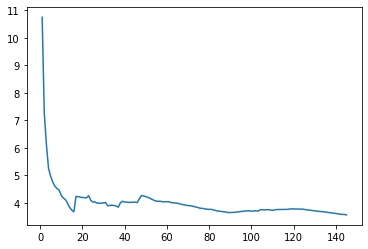

In [44]:
df = pd.DataFrame()
error_list = []
t = []
x = []
y = []
    
for i in range(1, 146):
    start = time.time()
    try:
        soup = BeautifulSoup(requests.get(f'https://muzhskoe-zhenskoe.su/?_page={i}').text, "html.parser")
        df = pd.concat([df, get_df(soup)], ignore_index=True)
    except:
        error_list.append(i)
        print(f'Error with: {i}')
    end = time.time()
    t += [end-start]
    r = round(((sum(t)/len(t))*(67-i))/60, 2)
    
    clear_output(wait=True)
    print(f'Возникло ошибок: {len(error_list)}\nСреднее время обработки составляет: {sum(t)/len(t):.5f} секунд\nОсталось: {r} минут')
    x += [i]
    y += [sum(t)/len(t)]
    plt.plot(x, y)
    plt.show()

In [55]:
for i in df.loc[df['Кол-во комментариев'] == df['Кол-во комментариев'].max()].values[0]:
    print(i,'\n')

04.03.2019 

Невеста с Канарских островов 

https://muzhskoe-zhenskoe.su/muzhskoe-zhenskoe-vypusk-ot-04-03-2019-nevesta-s-kanarskih-ostrovov.html 

В предыдущем выпуске программы "Мужское Женское" под названием "Пещерная женщина" зрители познакомились с Ольгой, которая вот уже много лет проживает отшельницей в небольшой пещере на Канарских островах. Женщина заявила, что ей надоело быть одной и она желает найти себе пару. В свое время она была замужем за настоящим миллионером, пребывала в отношениях со многими знаменитостями и являлась музой для творческих людей. Ольгу знали как самую известную россиянку на острове, но сейчас она отшельница мечтающая о простом женском счастье. 

68 



In [6]:
url = 'https://www.1tv.ru/shows/muzhskoezhenskoe'

In [8]:
soup = BeautifulSoup(requests.get(url).text, "html.parser")

In [42]:
for i in soup.find_all('h3'):
    j = i.get_text().index('Мужское')
    print(i.get_text()[:j-1])

Донецк.
Крым 2022.
Дети Донбасса.
Дважды преданные.
Мариуполь 2022.
Люди, которые боятся грозы.
И после смерти нет покоя…
«Вы в своем уме? Почему бабушка и дедушка должны платить вам алименты?». Юлия Барановская разбирается в мотивах героини. 
И после смерти нет покоя…
Слово матери.
«”Геннадий Великолепный” не простил жене, что она его оставила». Почему мужчина мстит матери своих сыновей?
Слово матери.


In [9]:
soup

<!DOCTYPE html>
<html data-default-locale="ru" data-locale="ru" data-relap="wCMj8-cmLtQuZ2dn" lang="ru" prefix="og: http://ogp.me/ns# video: http://ogp.me/ns/video# ya: http://webmaster.yandex.ru/vocabularies/"><head><title>Мужское / Женское. Первый канал</title><meta content="width=device-width" name="viewport"/><meta content="5a19a8b684384477" name="yandex-verification"/><meta content="bdqON8tEEVtdbYOQrtK7JrO1tMkPyIn_nHDL8MQRi8s" name="google-site-verification"/><meta charset="utf-8"/><link href="//static.1tv.ru/assets/web/favicon/apple-touch-icon-57x57-45f3846a4777b87c6f793466ef079aec24aeb92871b0ba886a011798e8152db7.png" rel="apple-touch-icon" sizes="57x57"/><link href="//static.1tv.ru/assets/web/favicon/apple-touch-icon-60x60-97f85049b33e6a20491adc9fadb96efbd8d12c9b2abb15fe76823e23a845950d.png" rel="apple-touch-icon" sizes="60x60"/><link href="//static.1tv.ru/assets/web/favicon/apple-touch-icon-72x72-0949f0fc74e802979eac9ea740644aa799897744138be5e88242c4a8f3211c6f.png" rel="apple-t